In [1]:
from tensorflow.python.client import device_lib
devices=device_lib.list_local_devices()
def sizeof_fmt(num,suffix='B'):
    for unit in ['','Ki','Mi','Gi', 'Ti', 'Pi','Ei','Zi']:
        if abs(num)<1024.0:
            return "%3.1f %s%s" %(num, unit, suffix)
        num/=1024.0
    return "%.1f%s%s" %(num, 'Yi', suffix)
for d in devices:
    t=d.device_type
    name=d.physical_device_desc
    l = [item.split(':',1) for item in name.split(", ")]
    name_attr = dict([x for x in l if len (x)==2])
    dev = name_attr.get('name', 'Unnamed device')
    print(f" {d.name} || {dev} || {t} || {sizeof_fmt(d.memory_limit)}")

 /device:CPU:0 || Unnamed device || CPU || 256.0 MiB
 /device:GPU:0 ||  Quadro RTX 6000 || GPU || 21.7 GiB


In [2]:
import tensorflow as tf

from tensorflow.compat.v1.keras.backend import set_session

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
set_session(sess)

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras import backend as K
from tensorflow import losses, optimizers
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.metrics import top_k_categorical_accuracy
from scipy.ndimage import zoom
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [3]:
import nibabel as nib
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image = nib.load(image_path)
            img = image.get_fdata()
            img = zoom(img, (0.533, 0.533, 0.413)) 
            img [img<0] = 0
            img_nor = img / np.max(img)
            img_nor = img_nor.astype(np.float32)  
            img_data_array.append(img_nor)
            class_name.append(dir1)
    return img_data_array, class_name

## extract the image array and class name
img_enh1, class_enh1 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\ADC\\fold1')
img_enh1L, class_enh1L =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\ADC\\fold1_L')

img_enh2, class_enh2 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\ADC\\fold2')
img_enh2L, class_enh2L =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\ADC\\fold2_L')

img_enh3, class_enh3 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\ADC\\fold3')
img_enh3L, class_enh3L =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\ADC\\fold3_L')

img_enh4, class_enh4 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\ADC\\fold4')
img_enh4L, class_enh4L =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\ADC\\fold4_L')

img_enh5, class_enh5 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\ADC\\fold5')
img_enh5L, class_enh5L =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\ADC\\fold5_L')
################################################################################################
img_enh12, class_enh12 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\CE\\fold1')
img_enh1L2, class_enh1L2 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\CE\\fold1_L')

img_enh22, class_enh22=create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\CE\\fold2')
img_enh2L2, class_enh2L2 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\CE\\fold2_L')

img_enh32, class_enh32 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\CE\\fold3')
img_enh3L2, class_enh3L2 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\CE\\fold3_L')

img_enh42, class_enh42 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\CE\\fold4')
img_enh4L2, class_enh4L2 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\CE\\fold4_L')

img_enh52, class_enh52 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\CE\\fold5')
img_enh5L2, class_enh5L2 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\CE\\fold5_L')
###########################################################################################
img_enh13, class_enh13 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\F\\fold1')
img_enh1L3, class_enh1L3 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\F\\fold1_L')

img_enh23, class_enh23=create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\F\\fold2')
img_enh2L3, class_enh2L3 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\F\\fold2_L')

img_enh33, class_enh33 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\F\\fold3')
img_enh3L3, class_enh3L3 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\F\\fold3_L')

img_enh43, class_enh43 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\F\\fold4')
img_enh4L3, class_enh4L3 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\F\\fold4_L')

img_enh53, class_enh53 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\F\\fold5')
img_enh5L3, class_enh5L3 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\F\\fold5_L')
#########################################################################################################
target_enh1={k: v for v, k in enumerate(np.unique(class_enh1))}
target_label_enh1=  [target_enh1[class_enh1[i]] for i in range(len(class_enh1))]
print(target_enh1)
target_enh1L={k: v for v, k in enumerate(np.unique(class_enh1L))}
target_label_enh1L=  [target_enh1L[class_enh1L[i]] for i in range(len(class_enh1L))]
print(target_enh1L)

target_enh2={k: v for v, k in enumerate(np.unique(class_enh2))}
target_label_enh2=  [target_enh2[class_enh2[i]] for i in range(len(class_enh2))]
print(target_enh2)
target_enh2L={k: v for v, k in enumerate(np.unique(class_enh2L))}
target_label_enh2L=  [target_enh2L[class_enh2L[i]] for i in range(len(class_enh2L))]
print(target_enh2L)

target_enh3={k: v for v, k in enumerate(np.unique(class_enh3))}
target_label_enh3=  [target_enh3[class_enh3[i]] for i in range(len(class_enh3))]
print(target_enh3)
target_enh3L={k: v for v, k in enumerate(np.unique(class_enh3L))}
target_label_enh3L=  [target_enh3L[class_enh3L[i]] for i in range(len(class_enh3L))]
print(target_enh3L)

target_enh4={k: v for v, k in enumerate(np.unique(class_enh4))}
target_label_enh4=  [target_enh4[class_enh4[i]] for i in range(len(class_enh4))]
print(target_enh4)
target_enh4L={k: v for v, k in enumerate(np.unique(class_enh4L))}
target_label_enh4L=  [target_enh4L[class_enh4L[i]] for i in range(len(class_enh4L))]
print(target_enh4L)

target_enh5={k: v for v, k in enumerate(np.unique(class_enh5))}
target_label_enh5=  [target_enh5[class_enh5[i]] for i in range(len(class_enh5))]
print(target_enh5)
target_enh5L={k: v for v, k in enumerate(np.unique(class_enh5L))}
target_label_enh5L=  [target_enh5L[class_enh5L[i]] for i in range(len(class_enh5L))]
print(target_enh5L)

###########################################################################################
target_enh12={k: v for v, k in enumerate(np.unique(class_enh12))}
target_label_enh12=  [target_enh12[class_enh12[i]] for i in range(len(class_enh12))]
print(target_enh12)
target_enh1L2={k: v for v, k in enumerate(np.unique(class_enh1L2))}
target_label_enh1L2=  [target_enh1L2[class_enh1L2[i]] for i in range(len(class_enh1L2))]
print(target_enh1L2)

target_enh22={k: v for v, k in enumerate(np.unique(class_enh22))}
target_label_enh22=  [target_enh22[class_enh22[i]] for i in range(len(class_enh22))]
print(target_enh22)
target_enh2L2={k: v for v, k in enumerate(np.unique(class_enh2L2))}
target_label_enh2L2=  [target_enh2L2[class_enh2L2[i]] for i in range(len(class_enh2L2))]
print(target_enh2L2)

target_enh32={k: v for v, k in enumerate(np.unique(class_enh32))}
target_label_enh32=  [target_enh32[class_enh32[i]] for i in range(len(class_enh32))]
print(target_enh32)
target_enh3L2={k: v for v, k in enumerate(np.unique(class_enh3L2))}
target_label_enh3L2=  [target_enh3L2[class_enh3L2[i]] for i in range(len(class_enh3L2))]
print(target_enh3L2)

target_enh42={k: v for v, k in enumerate(np.unique(class_enh42))}
target_label_enh42=  [target_enh42[class_enh42[i]] for i in range(len(class_enh42))]
print(target_enh42)
target_enh4L2={k: v for v, k in enumerate(np.unique(class_enh4L2))}
target_label_enh4L2=  [target_enh4L2[class_enh4L2[i]] for i in range(len(class_enh4L2))]
print(target_enh4L2)

target_enh52={k: v for v, k in enumerate(np.unique(class_enh52))}
target_label_enh52=  [target_enh52[class_enh52[i]] for i in range(len(class_enh52))]
print(target_enh52)
target_enh5L2={k: v for v, k in enumerate(np.unique(class_enh5L2))}
target_label_enh5L2=  [target_enh5L2[class_enh5L2[i]] for i in range(len(class_enh5L2))]
print(target_enh5L2)
#######################################################################################################
target_enh13={k: v for v, k in enumerate(np.unique(class_enh13))}
target_label_enh13=  [target_enh13[class_enh13[i]] for i in range(len(class_enh13))]
print(target_enh13)
target_enh1L3={k: v for v, k in enumerate(np.unique(class_enh1L3))}
target_label_enh1L3=  [target_enh1L3[class_enh1L3[i]] for i in range(len(class_enh1L3))]
print(target_enh1L3)

target_enh23={k: v for v, k in enumerate(np.unique(class_enh23))}
target_label_enh23=  [target_enh23[class_enh23[i]] for i in range(len(class_enh23))]
print(target_enh23)
target_enh2L3={k: v for v, k in enumerate(np.unique(class_enh2L3))}
target_label_enh2L3=  [target_enh2L3[class_enh2L3[i]] for i in range(len(class_enh2L3))]
print(target_enh2L3)

target_enh33={k: v for v, k in enumerate(np.unique(class_enh33))}
target_label_enh33=  [target_enh33[class_enh33[i]] for i in range(len(class_enh33))]
print(target_enh33)
target_enh3L3={k: v for v, k in enumerate(np.unique(class_enh3L3))}
target_label_enh3L3=  [target_enh3L2[class_enh3L2[i]] for i in range(len(class_enh3L3))]
print(target_enh3L3)

target_enh43={k: v for v, k in enumerate(np.unique(class_enh43))}
target_label_enh43=  [target_enh43[class_enh43[i]] for i in range(len(class_enh43))]
print(target_enh43)
target_enh4L3={k: v for v, k in enumerate(np.unique(class_enh4L3))}
target_label_enh4L3=  [target_enh4L3[class_enh4L3[i]] for i in range(len(class_enh4L3))]
print(target_enh4L3)

target_enh53={k: v for v, k in enumerate(np.unique(class_enh53))}
target_label_enh53=  [target_enh53[class_enh53[i]] for i in range(len(class_enh53))]
print(target_enh53)
target_enh5L3={k: v for v, k in enumerate(np.unique(class_enh5L3))}
target_label_enh5L3=  [target_enh5L3[class_enh5L3[i]] for i in range(len(class_enh5L3))]
print(target_enh5L3)
#######################################################################################################
x_enh1=np.array(img_enh1, np.float32)
y_enh1=np.array(list(map(int,target_label_enh1)), np.float32)
X_enh1 = np.expand_dims(x_enh1, axis=4)
x_enh1L=np.array(img_enh1L, np.float32)
y_enh1L=np.array(list(map(int,target_label_enh1L)), np.float32)
X_enh1L = np.expand_dims(x_enh1L, axis=4)

x_enh2=np.array(img_enh2, np.float32)
y_enh2=np.array(list(map(int,target_label_enh2)), np.float32)
X_enh2 = np.expand_dims(x_enh2, axis=4)
x_enh2L=np.array(img_enh2L, np.float32)
y_enh2L=np.array(list(map(int,target_label_enh2L)), np.float32)
X_enh2L = np.expand_dims(x_enh2L, axis=4)

x_enh3=np.array(img_enh3, np.float32)
y_enh3=np.array(list(map(int,target_label_enh3)), np.float32)
X_enh3 = np.expand_dims(x_enh3, axis=4)
x_enh3L=np.array(img_enh3L, np.float32)
y_enh3L=np.array(list(map(int,target_label_enh3L)), np.float32)
X_enh3L = np.expand_dims(x_enh3L, axis=4)
 
x_enh4=np.array(img_enh4, np.float32)
y_enh4=np.array(list(map(int,target_label_enh4)), np.float32)
X_enh4 = np.expand_dims(x_enh4, axis=4)
x_enh4L=np.array(img_enh4L, np.float32)
y_enh4L=np.array(list(map(int,target_label_enh4L)), np.float32)
X_enh4L = np.expand_dims(x_enh4L, axis=4)

x_enh5=np.array(img_enh5, np.float32)
y_enh5=np.array(list(map(int,target_label_enh5)), np.float32)
X_enh5 = np.expand_dims(x_enh5, axis=4)
x_enh5L=np.array(img_enh5L, np.float32)
y_enh5L=np.array(list(map(int,target_label_enh5L)), np.float32)
X_enh5L = np.expand_dims(x_enh5L, axis=4)
######################################################################################################
#######################################################################################################
x_enh12=np.array(img_enh12, np.float32)
y_enh12=np.array(list(map(int,target_label_enh12)), np.float32)
X_enh12 = np.expand_dims(x_enh12, axis=4)
x_enh1L2=np.array(img_enh1L2, np.float32)
y_enh1L2=np.array(list(map(int,target_label_enh1L2)), np.float32)
X_enh1L2 = np.expand_dims(x_enh1L2, axis=4)

x_enh22=np.array(img_enh22, np.float32)
y_enh22=np.array(list(map(int,target_label_enh22)), np.float32)
X_enh22 = np.expand_dims(x_enh22, axis=4)
x_enh2L2=np.array(img_enh2L2, np.float32)
y_enh2L2=np.array(list(map(int,target_label_enh2L2)), np.float32)
X_enh2L2 = np.expand_dims(x_enh2L2, axis=4)
 
x_enh32=np.array(img_enh32, np.float32)
y_enh32=np.array(list(map(int,target_label_enh32)), np.float32)
X_enh32 = np.expand_dims(x_enh32, axis=4)
x_enh3L2=np.array(img_enh3L2, np.float32)
y_enh3L2=np.array(list(map(int,target_label_enh3L2)), np.float32)
X_enh3L2 = np.expand_dims(x_enh3L2, axis=4)

x_enh42=np.array(img_enh42, np.float32)
y_enh42=np.array(list(map(int,target_label_enh42)), np.float32)
X_enh42 = np.expand_dims(x_enh42, axis=4)
x_enh4L2=np.array(img_enh4L2, np.float32)
y_enh4L2=np.array(list(map(int,target_label_enh4L2)), np.float32)
X_enh4L2 = np.expand_dims(x_enh4L2, axis=4)

x_enh52=np.array(img_enh52, np.float32)
y_enh52=np.array(list(map(int,target_label_enh52)), np.float32)
X_enh52 = np.expand_dims(x_enh52, axis=4)
x_enh5L2=np.array(img_enh5L2, np.float32)
y_enh5L2=np.array(list(map(int,target_label_enh5L2)), np.float32)
X_enh5L2 = np.expand_dims(x_enh5L2, axis=4)

######################################################################################################
x_enh13=np.array(img_enh13, np.float32)
y_enh13=np.array(list(map(int,target_label_enh13)), np.float32)
X_enh13 = np.expand_dims(x_enh13, axis=4)
x_enh1L3=np.array(img_enh1L3, np.float32)
y_enh1L3=np.array(list(map(int,target_label_enh1L3)), np.float32)
X_enh1L3 = np.expand_dims(x_enh1L3, axis=4)

x_enh23=np.array(img_enh23, np.float32)
y_enh23=np.array(list(map(int,target_label_enh23)), np.float32)
X_enh23 = np.expand_dims(x_enh23, axis=4)
x_enh2L3=np.array(img_enh2L3, np.float32)
y_enh2L3=np.array(list(map(int,target_label_enh2L3)), np.float32)
X_enh2L3 = np.expand_dims(x_enh2L3, axis=4)
 
x_enh33=np.array(img_enh33, np.float32)
y_enh33=np.array(list(map(int,target_label_enh33)), np.float32)
X_enh33 = np.expand_dims(x_enh33, axis=4)
x_enh3L3=np.array(img_enh3L3, np.float32)
y_enh3L3=np.array(list(map(int,target_label_enh3L3)), np.float32)
X_enh3L3 = np.expand_dims(x_enh3L3, axis=4)

x_enh43=np.array(img_enh43, np.float32)
y_enh43=np.array(list(map(int,target_label_enh43)), np.float32)
X_enh43 = np.expand_dims(x_enh43, axis=4)
x_enh4L3=np.array(img_enh4L3, np.float32)
y_enh4L3=np.array(list(map(int,target_label_enh4L3)), np.float32)
X_enh4L3 = np.expand_dims(x_enh4L3, axis=4)

x_enh53=np.array(img_enh53, np.float32)
y_enh53=np.array(list(map(int,target_label_enh53)), np.float32)
X_enh53 = np.expand_dims(x_enh53, axis=4)
x_enh5L3=np.array(img_enh5L3, np.float32)
y_enh5L3=np.array(list(map(int,target_label_enh5L3)), np.float32)
X_enh5L3 = np.expand_dims(x_enh5L3, axis=4)

######################################################################################################
print("################ tumor edema T2 shapes #####################")

print(X_enh1.shape)
print(X_enh1L.shape)
print(y_enh1.shape)
print(y_enh1L.shape)

print("################ tumor enhance CE shapes #####################")

print(X_enh12.shape)
print(X_enh1L2.shape)
print(y_enh12.shape)
print(y_enh1L2.shape)

{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
################ tumor edema T2 shapes #

In [3]:
import nibabel as nib
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image = nib.load(image_path)
            img = image.get_fdata()
            img = zoom(img, (0.533, 0.533, 0.413)) 
            img [img<0] = 0
            img_nor = img / np.max(img)
            img_nor = img_nor.astype(np.float32)
            
            img_data_array.append(img_nor)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name

img_test, class_test =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\ADC\\External')
img_test2, class_test2 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\CE\\External')
img_test3, class_test3 =create_dataset(r'C:\\Dhruba Research Drive\\enh_CE_ADC_edemF\\F\\External')
####################################################################################################

target_dict_test={k: v for v, k in enumerate(np.unique(class_test))}
target_val_test=  [target_dict_test[class_test[i]] for i in range(len(class_test))]
print(target_dict_test)
####################################################################################################

target_dict_test2={k: v for v, k in enumerate(np.unique(class_test2))}
target_val_test2=  [target_dict_test2[class_test2[i]] for i in range(len(class_test2))]
print(target_dict_test2)
#######################################################################################################

target_dict_test3={k: v for v, k in enumerate(np.unique(class_test3))}
target_val_test3=  [target_dict_test3[class_test3[i]] for i in range(len(class_test3))]
print(target_dict_test3)
#######################################################################################################
### Enh_ADC tumor Shape
x_test=np.array(img_test, np.float32)
y_test=np.array(list(map(int,target_val_test)), np.float32)
X_test = np.expand_dims(x_test, axis=4)
### Enh_CE tumor Shape
x_test2=np.array(img_test2, np.float32)
y_test2=np.array(list(map(int,target_val_test2)), np.float32)
X_test2 = np.expand_dims(x_test2, axis=4)
### Edema_F tumor Shape
x_test3=np.array(img_test3, np.float32)
y_test3=np.array(list(map(int,target_val_test3)), np.float32)
X_test3 = np.expand_dims(x_test3, axis=4)

print("################ Enh_ADC tumor shapes #####################")
print(X_test.shape)
print(y_test.shape)
print("################ Enh_Ce tumor shapes #####################")
print(X_test2.shape)
print(y_test2.shape)
print("################ Edema_F tumor shapes #####################")
print(X_test3.shape)
print(y_test3.shape)

{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
################ Enh_ADC tumor shapes #####################
(84, 128, 128, 64, 1)
(84,)
################ Enh_Ce tumor shapes #####################
(84, 128, 128, 64, 1)
(84,)
################ Edema_F tumor shapes #####################
(84, 128, 128, 64, 1)
(84,)


In [5]:
target_dict_test3={k: v for v, k in enumerate(np.unique(class_test3))}
target_val_test3=  [target_dict_test3[class_test3[i]] for i in range(len(class_test3))]
print(target_dict_test3)
#######################################################################################################
### Enh_ADC tumor Shape
x_test=np.array(img_test, np.float32)
y_test=np.array(list(map(int,target_val_test)), np.float32)
X_test = np.expand_dims(x_test, axis=4)
### Enh_CE tumor Shape
x_test2=np.array(img_test2, np.float32)
y_test2=np.array(list(map(int,target_val_test2)), np.float32)
X_test2 = np.expand_dims(x_test2, axis=4)
### Edema_F tumor Shape
x_test3=np.array(img_test3, np.float32)
y_test3=np.array(list(map(int,target_val_test3)), np.float32)
X_test3 = np.expand_dims(x_test3, axis=4)

print("################ Enh_ADC tumor shapes #####################")
print(X_test.shape)
print(y_test.shape)
print("################ Enh_Ce tumor shapes #####################")
print(X_test2.shape)
print(y_test2.shape)
print("################ Edema_F tumor shapes #####################")
print(X_test3.shape)
print(y_test3.shape)

{'GBM': 0, 'LYM': 1, 'Mets': 2}
################ Enh_ADC tumor shapes #####################
(84, 128, 128, 64, 1)
(84,)
################ Enh_Ce tumor shapes #####################
(84, 128, 128, 64, 1)
(84,)
################ Edema_F tumor shapes #####################
(84, 128, 128, 64, 1)
(84,)


In [14]:
np.arange(-5, 16, 10)

array([-5,  5, 15])

In [4]:
from scipy import ndimage
############################## LYM ################################################
############################# Fold1 ###################################
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh1L.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh1L[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh1L[d]
            class_aug_array.append(y_train_class)

X_enh_aug1_r = np.array(img_aug_array, np.float32)
X_enh_aug1_r = np.expand_dims(X_enh_aug1_r, axis=4)
print(X_enh_aug1_r.shape)
y_enh_aug1_r = np.array(class_aug_array, np.float32)
print(y_enh_aug1_r.shape)
###########
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh1L2.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh1L2[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh1L2[d]
            class_aug_array.append(y_train_class)

X_enh_aug1_r2 = np.array(img_aug_array, np.float32)
X_enh_aug1_r2 = np.expand_dims(X_enh_aug1_r2, axis=4)
print(X_enh_aug1_r2.shape)
y_enh_aug1_r2 = np.array(class_aug_array, np.float32)
print(y_enh_aug1_r2.shape)
###########
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh1L3.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh1L3[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh1L3[d]
            class_aug_array.append(y_train_class)

X_enh_aug1_r3 = np.array(img_aug_array, np.float32)
X_enh_aug1_r3 = np.expand_dims(X_enh_aug1_r3, axis=4)
print(X_enh_aug1_r3.shape)
y_enh_aug1_r3 = np.array(class_aug_array, np.float32)
print(y_enh_aug1_r3.shape)
############################# Fold2 ###################################

img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh2L.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh2L[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh2L[d]
            class_aug_array.append(y_train_class)

X_enh_aug2_r = np.array(img_aug_array, np.float32)
X_enh_aug2_r = np.expand_dims(X_enh_aug2_r, axis=4)
print(X_enh_aug2_r.shape)
y_enh_aug2_r = np.array(class_aug_array, np.float32)
print(y_enh_aug2_r.shape)
##################
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh2L2.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh2L2[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh2L2[d]
            class_aug_array.append(y_train_class)

X_enh_aug2_r2 = np.array(img_aug_array, np.float32)
X_enh_aug2_r2 = np.expand_dims(X_enh_aug2_r2, axis=4)
print(X_enh_aug2_r2.shape)
y_enh_aug2_r2 = np.array(class_aug_array, np.float32)
print(y_enh_aug2_r2.shape)
##################
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh2L3.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh2L3[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh2L3[d]
            class_aug_array.append(y_train_class)

X_enh_aug2_r3 = np.array(img_aug_array, np.float32)
X_enh_aug2_r3 = np.expand_dims(X_enh_aug2_r3, axis=4)
print(X_enh_aug2_r3.shape)
y_enh_aug2_r3 = np.array(class_aug_array, np.float32)
print(y_enh_aug2_r3.shape)
############################# Fold3 ###################################

img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh3L.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh3L[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh3L[d]
            class_aug_array.append(y_train_class)

X_enh_aug3_r = np.array(img_aug_array, np.float32)
X_enh_aug3_r = np.expand_dims(X_enh_aug3_r, axis=4)
print(X_enh_aug3_r.shape)
y_enh_aug3_r = np.array(class_aug_array, np.float32)
print(y_enh_aug3_r.shape)
#################
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh3L2.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh3L2[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh3L2[d]
            class_aug_array.append(y_train_class)

X_enh_aug3_r2 = np.array(img_aug_array, np.float32)
X_enh_aug3_r2 = np.expand_dims(X_enh_aug3_r2, axis=4)
print(X_enh_aug3_r2.shape)
y_enh_aug3_r2 = np.array(class_aug_array, np.float32)
print(y_enh_aug3_r2.shape)
#################
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh3L3.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh3L3[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh3L3[d]
            class_aug_array.append(y_train_class)

X_enh_aug3_r3 = np.array(img_aug_array, np.float32)
X_enh_aug3_r3 = np.expand_dims(X_enh_aug3_r3, axis=4)
print(X_enh_aug3_r3.shape)
y_enh_aug3_r3 = np.array(class_aug_array, np.float32)
print(y_enh_aug3_r3.shape)
############################# Fold4 ###################################

img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh4L.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh4L[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh4L[d]
            class_aug_array.append(y_train_class)

X_enh_aug4_r = np.array(img_aug_array, np.float32)
X_enh_aug4_r = np.expand_dims(X_enh_aug4_r, axis=4)
print(X_enh_aug4_r.shape)
y_enh_aug4_r = np.array(class_aug_array, np.float32)
print(y_enh_aug4_r.shape)
################
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh4L2.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh4L2[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh4L2[d]
            class_aug_array.append(y_train_class)

X_enh_aug4_r2 = np.array(img_aug_array, np.float32)
X_enh_aug4_r2 = np.expand_dims(X_enh_aug4_r2, axis=4)
print(X_enh_aug4_r2.shape)
y_enh_aug4_r2 = np.array(class_aug_array, np.float32)
print(y_enh_aug4_r2.shape)
################
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh4L3.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh4L3[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh4L3[d]
            class_aug_array.append(y_train_class)

X_enh_aug4_r3 = np.array(img_aug_array, np.float32)
X_enh_aug4_r3 = np.expand_dims(X_enh_aug4_r3, axis=4)
print(X_enh_aug4_r3.shape)
y_enh_aug4_r3 = np.array(class_aug_array, np.float32)
print(y_enh_aug4_r3.shape)
############################# Fold5 ###################################

img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh5L.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh5L[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh5L[d]
            class_aug_array.append(y_train_class)

X_enh_aug5_r = np.array(img_aug_array, np.float32)
X_enh_aug5_r = np.expand_dims(X_enh_aug5_r, axis=4)
print(X_enh_aug5_r.shape)
y_enh_aug5_r = np.array(class_aug_array, np.float32)
print(y_enh_aug5_r.shape)
################
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh5L2.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh5L2[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh5L2[d]
            class_aug_array.append(y_train_class)

X_enh_aug5_r2 = np.array(img_aug_array, np.float32)
X_enh_aug5_r2 = np.expand_dims(X_enh_aug5_r2, axis=4)
print(X_enh_aug5_r2.shape)
y_enh_aug5_r2 = np.array(class_aug_array, np.float32)
print(y_enh_aug5_r2.shape)
################
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh5L3.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh5L3[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh5L3[d]
            class_aug_array.append(y_train_class)

X_enh_aug5_r3 = np.array(img_aug_array, np.float32)
X_enh_aug5_r3 = np.expand_dims(X_enh_aug5_r3, axis=4)
print(X_enh_aug5_r3.shape)
y_enh_aug5_r3 = np.array(class_aug_array, np.float32)
print(y_enh_aug5_r3.shape)

(36, 128, 128, 64, 1)
(36,)
(36, 128, 128, 64, 1)
(36,)
(36, 128, 128, 64, 1)
(36,)
(39, 128, 128, 64, 1)
(39,)
(39, 128, 128, 64, 1)
(39,)
(39, 128, 128, 64, 1)
(39,)
(45, 128, 128, 64, 1)
(45,)
(45, 128, 128, 64, 1)
(45,)
(45, 128, 128, 64, 1)
(45,)
(45, 128, 128, 64, 1)
(45,)
(45, 128, 128, 64, 1)
(45,)
(45, 128, 128, 64, 1)
(45,)
(42, 128, 128, 64, 1)
(42,)
(42, 128, 128, 64, 1)
(42,)
(42, 128, 128, 64, 1)
(42,)


In [5]:
X_enh1c = np.concatenate((X_enh1, X_enh_aug1_r), axis=0)
print(X_enh1c.shape)
#############################################################################
X_enh2c = np.concatenate((X_enh2, X_enh_aug2_r), axis=0)
print(X_enh2c.shape)
#############################################################################
X_enh3c = np.concatenate((X_enh3, X_enh_aug3_r), axis=0)
print(X_enh3c.shape)
#############################################################################
X_enh4c = np.concatenate((X_enh4, X_enh_aug4_r), axis=0)
print(X_enh4c.shape)
#############################################################################
X_enh5c = np.concatenate((X_enh5, X_enh_aug5_r), axis=0)
print(X_enh5c.shape)
################################# label ######################################
##############################################################################
y_enh1c = np.concatenate((y_enh1, y_enh_aug1_r), axis=0)
print(y_enh1c.shape)
#############################################################################
y_enh2c = np.concatenate((y_enh2, y_enh_aug2_r), axis=0)
print(y_enh2c.shape)
#############################################################################
y_enh3c = np.concatenate((y_enh3, y_enh_aug3_r), axis=0)
print(y_enh3c.shape)
#############################################################################
y_enh4c = np.concatenate((y_enh4, y_enh_aug4_r), axis=0)
print(y_enh4c.shape)
#############################################################################
y_enh5c = np.concatenate((y_enh5, y_enh_aug5_r), axis=0)
print(y_enh5c.shape)

#############
X_enh1c2 = np.concatenate((X_enh12, X_enh_aug1_r2), axis=0)
print(X_enh1c2.shape)
#############################################################################
X_enh2c2 = np.concatenate((X_enh22, X_enh_aug2_r2), axis=0)
print(X_enh2c2.shape)
#############################################################################
X_enh3c2 = np.concatenate((X_enh32, X_enh_aug3_r2), axis=0)
print(X_enh3c2.shape)
#############################################################################
X_enh4c2 = np.concatenate((X_enh42, X_enh_aug4_r2), axis=0)
print(X_enh4c2.shape)
#############################################################################
X_enh5c2 = np.concatenate((X_enh52, X_enh_aug5_r2), axis=0)
print(X_enh5c2.shape)
################################# label ######################################
##############################################################################
y_enh1c2 = np.concatenate((y_enh12, y_enh_aug1_r2), axis=0)
print(y_enh1c2.shape)
#############################################################################
y_enh2c2 = np.concatenate((y_enh22, y_enh_aug2_r2), axis=0)
print(y_enh2c2.shape)
#############################################################################
y_enh3c2 = np.concatenate((y_enh32, y_enh_aug3_r2), axis=0)
print(y_enh3c2.shape)
#############################################################################
y_enh4c2 = np.concatenate((y_enh42, y_enh_aug4_r2), axis=0)
print(y_enh4c2.shape)
#############################################################################
y_enh5c2 = np.concatenate((y_enh52, y_enh_aug5_r2), axis=0)
print(y_enh5c2.shape)

#############
X_enh1c3 = np.concatenate((X_enh13, X_enh_aug1_r3), axis=0)
print(X_enh1c3.shape)
#############################################################################
X_enh2c3 = np.concatenate((X_enh23, X_enh_aug2_r3), axis=0)
print(X_enh2c3.shape)
#############################################################################
X_enh3c3 = np.concatenate((X_enh33, X_enh_aug3_r3), axis=0)
print(X_enh3c3.shape)
#############################################################################
X_enh4c3 = np.concatenate((X_enh43, X_enh_aug4_r3), axis=0)
print(X_enh4c3.shape)
#############################################################################
X_enh5c3 = np.concatenate((X_enh53, X_enh_aug5_r3), axis=0)
print(X_enh5c3.shape)
################################# label ######################################
##############################################################################
y_enh1c3 = np.concatenate((y_enh13, y_enh_aug1_r3), axis=0)
print(y_enh1c3.shape)
#############################################################################
y_enh2c3 = np.concatenate((y_enh23, y_enh_aug2_r3), axis=0)
print(y_enh2c3.shape)
#############################################################################
y_enh3c3 = np.concatenate((y_enh33, y_enh_aug3_r3), axis=0)
print(y_enh3c3.shape)
#############################################################################
y_enh4c3 = np.concatenate((y_enh43, y_enh_aug4_r3), axis=0)
print(y_enh4c3.shape)
#############################################################################
y_enh5c3 = np.concatenate((y_enh53, y_enh_aug5_r3), axis=0)
print(y_enh5c3.shape)

(109, 128, 128, 64, 1)
(121, 128, 128, 64, 1)
(132, 128, 128, 64, 1)
(132, 128, 128, 64, 1)
(129, 128, 128, 64, 1)
(109,)
(121,)
(132,)
(132,)
(129,)
(109, 128, 128, 64, 1)
(121, 128, 128, 64, 1)
(132, 128, 128, 64, 1)
(132, 128, 128, 64, 1)
(129, 128, 128, 64, 1)
(109,)
(121,)
(132,)
(132,)
(129,)
(109, 128, 128, 64, 1)
(121, 128, 128, 64, 1)
(132, 128, 128, 64, 1)
(132, 128, 128, 64, 1)
(129, 128, 128, 64, 1)
(109,)
(121,)
(132,)
(132,)
(129,)


In [6]:
import scipy

def scaleit(image, factor, isseg=False):
    order = 0 if isseg == True else 1

    height, width, depth= image.shape
    zheight             = int(np.round(factor * height))
    zwidth              = int(np.round(factor * width))
    zdepth              = depth

    if factor < 1.0:
        newimg  = np.zeros_like(image)
        row     = (height - zheight) // 2
        col     = (width - zwidth) // 2
        layer   = (depth - zdepth) // 2
        newimg[row:row+zheight, col:col+zwidth, layer:layer+zdepth] = scipy.ndimage.interpolation.zoom(image, (float(factor), float(factor), 1.0), order=order, mode='nearest')[0:zheight, 0:zwidth, 0:zdepth]

        return newimg

    elif factor > 1.0:
        row     = (zheight - height) // 2
        col     = (zwidth - width) // 2
        layer   = (zdepth - depth) // 2

        newimg = scipy.ndimage.interpolation.zoom(image[row:row+zheight, col:col+zwidth, layer:layer+zdepth], (float(factor), float(factor), 1.0), order=order, mode='nearest')  
        
        extrah = (newimg.shape[0] - height) // 2
        extraw = (newimg.shape[1] - width) // 2
        extrad = (newimg.shape[2] - depth) // 2
        newimg = newimg[extrah:extrah+height, extraw:extraw+width, extrad:extrad+depth]

        return newimg

    else:
        return image
    
################################ Enh_ADC  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh1c.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh1c[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh1c[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug1 = np.array(img_aug_array, np.float32)
X_enh_aug1 = np.expand_dims(X_enh_aug1, axis=4)
print(X_enh_aug1.shape)
y_enh_aug1 = np.array(class_aug_array, np.float32)
print(y_enh_aug1.shape)

################################ Enhan_CE  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh1c2.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh1c2[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh1c2[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug12 = np.array(img_aug_array, np.float32)
X_enh_aug12 = np.expand_dims(X_enh_aug12, axis=4)
print(X_enh_aug12.shape)
y_enh_aug12 = np.array(class_aug_array, np.float32)
print(y_enh_aug12.shape)

################################ Edema_F  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh1c3.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh1c3[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh1c3[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug13 = np.array(img_aug_array, np.float32)
X_enh_aug13 = np.expand_dims(X_enh_aug13, axis=4)
print(X_enh_aug13.shape)
y_enh_aug13 = np.array(class_aug_array, np.float32)
print(y_enh_aug13.shape)
################################ Enh_ADC  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh2c.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh2c[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh2c[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug2 = np.array(img_aug_array, np.float32)
X_enh_aug2 = np.expand_dims(X_enh_aug2, axis=4)
print(X_enh_aug2.shape)
y_enh_aug2 = np.array(class_aug_array, np.float32)
print(y_enh_aug2.shape)
################################ Enhan_CE  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh2c2.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh2c2[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh2c2[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug22 = np.array(img_aug_array, np.float32)
X_enh_aug22 = np.expand_dims(X_enh_aug22, axis=4)
print(X_enh_aug22.shape)
y_enh_aug22 = np.array(class_aug_array, np.float32)
print(y_enh_aug22.shape)

################################ Edema_F  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh2c3.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh2c3[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh2c3[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug23 = np.array(img_aug_array, np.float32)
X_enh_aug23 = np.expand_dims(X_enh_aug23, axis=4)
print(X_enh_aug23.shape)
y_enh_aug23 = np.array(class_aug_array, np.float32)
print(y_enh_aug23.shape)
################################ Enh_ADC  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh3c.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh3c[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh3c[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug3 = np.array(img_aug_array, np.float32)
X_enh_aug3 = np.expand_dims(X_enh_aug3, axis=4)
print(X_enh_aug3.shape)
y_enh_aug3 = np.array(class_aug_array, np.float32)
print(y_enh_aug3.shape)

################################ Enhan_CE  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh3c2.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh3c2[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh3c2[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug32 = np.array(img_aug_array, np.float32)
X_enh_aug32 = np.expand_dims(X_enh_aug32, axis=4)
print(X_enh_aug32.shape)
y_enh_aug32 = np.array(class_aug_array, np.float32)
print(y_enh_aug32.shape)

################################ Edema_F  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh3c3.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh3c3[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh3c3[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug33 = np.array(img_aug_array, np.float32)
X_enh_aug33 = np.expand_dims(X_enh_aug33, axis=4)
print(X_enh_aug33.shape)
y_enh_aug33 = np.array(class_aug_array, np.float32)
print(y_enh_aug33.shape)
################################ Enh_ADC  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh4c.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh4c[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh4c[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug4 = np.array(img_aug_array, np.float32)
X_enh_aug4 = np.expand_dims(X_enh_aug4, axis=4)
print(X_enh_aug4.shape)
y_enh_aug4 = np.array(class_aug_array, np.float32)
print(y_enh_aug4.shape)
################################ Enhan_CE  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh4c2.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh4c2[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh4c2[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug42 = np.array(img_aug_array, np.float32)
X_enh_aug42 = np.expand_dims(X_enh_aug42, axis=4)
print(X_enh_aug42.shape)
y_enh_aug42 = np.array(class_aug_array, np.float32)
print(y_enh_aug42.shape)

#################################################################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh4c3.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh4c3[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh4c3[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug43 = np.array(img_aug_array, np.float32)
X_enh_aug43 = np.expand_dims(X_enh_aug43, axis=4)
print(X_enh_aug43.shape)
y_enh_aug43 = np.array(class_aug_array, np.float32)
print(y_enh_aug43.shape)
# ################################ Enh_ADC  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh5c.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh5c[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh5c[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug5 = np.array(img_aug_array, np.float32)
X_enh_aug5 = np.expand_dims(X_enh_aug5, axis=4)
print(X_enh_aug5.shape)
y_enh_aug5 = np.array(class_aug_array, np.float32)
print(y_enh_aug5.shape)
# ################################ Enhan_CE  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh5c2.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh5c2[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh5c2[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug52 = np.array(img_aug_array, np.float32)
X_enh_aug52 = np.expand_dims(X_enh_aug52, axis=4)
print(X_enh_aug52.shape)
y_enh_aug52 = np.array(class_aug_array, np.float32)
print(y_enh_aug52.shape)
##################################################################################################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh5c3.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh5c3[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh5c3[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug53 = np.array(img_aug_array, np.float32)
X_enh_aug53 = np.expand_dims(X_enh_aug53, axis=4)
print(X_enh_aug53.shape)
y_enh_aug53 = np.array(class_aug_array, np.float32)
print(y_enh_aug53.shape)

(327, 128, 128, 64, 1)
(327,)
(327, 128, 128, 64, 1)
(327,)
(327, 128, 128, 64, 1)
(327,)
(363, 128, 128, 64, 1)
(363,)
(363, 128, 128, 64, 1)
(363,)
(363, 128, 128, 64, 1)
(363,)
(396, 128, 128, 64, 1)
(396,)
(396, 128, 128, 64, 1)
(396,)
(396, 128, 128, 64, 1)
(396,)
(396, 128, 128, 64, 1)
(396,)
(396, 128, 128, 64, 1)
(396,)
(396, 128, 128, 64, 1)
(396,)
(387, 128, 128, 64, 1)
(387,)
(387, 128, 128, 64, 1)
(387,)
(387, 128, 128, 64, 1)
(387,)


In [7]:
X_enh_f1 = X_enh_aug1[:, ::-1, :]
y_enh_f1 = y_enh_aug1
###############################################
X_enh_f2 = X_enh_aug2[:, ::-1, :]
y_enh_f2 = y_enh_aug2
###############################################
X_enh_f3 = X_enh_aug3[:, ::-1, :]
y_enh_f3 = y_enh_aug3
###############################################
X_enh_f4 = X_enh_aug4[:, ::-1, :]
y_enh_f4 = y_enh_aug4
###############################################
X_enh_f5 = X_enh_aug5[:, ::-1, :]
y_enh_f5 = y_enh_aug5
###############################################

X_enh_f12 = X_enh_aug12[:, ::-1, :]
y_enh_f12 = y_enh_aug12
###############################################
X_enh_f22 = X_enh_aug22[:, ::-1, :]
y_enh_f22 = y_enh_aug22
###############################################
X_enh_f32 = X_enh_aug32[:, ::-1, :]
y_enh_f32 = y_enh_aug32
###############################################
X_enh_f42 = X_enh_aug42[:, ::-1, :]
y_enh_f42 = y_enh_aug42
###############################################
X_enh_f52= X_enh_aug52[:, ::-1, :]
y_enh_f52 = y_enh_aug52
###############################################

X_enh_f13 = X_enh_aug13[:, ::-1, :]
y_enh_f13 = y_enh_aug13
###############################################
X_enh_f23 = X_enh_aug23[:, ::-1, :]
y_enh_f23 = y_enh_aug23
###############################################
X_enh_f33 = X_enh_aug33[:, ::-1, :]
y_enh_f33 = y_enh_aug33
###############################################
X_enh_f43 = X_enh_aug43[:, ::-1, :]
y_enh_f43 = y_enh_aug43
###############################################
X_enh_f53= X_enh_aug53[:, ::-1, :]
y_enh_f53 = y_enh_aug53
###############################################

In [30]:
# X_train_aug1 = np.concatenate((X_enh_aug2, X_enh_f2, X_enh_aug3, X_enh_f3, X_enh_aug4, X_enh_f4,
#                               X_enh_aug5, X_enh_f5), axis=0)
# print(X_train_aug1.shape)
# y_train_aug1 = np.concatenate((y_enh_aug2, y_enh_f2, y_enh_aug3, y_enh_f3, y_enh_aug4, y_enh_f4,
#                               y_enh_aug5, y_enh_f5), axis=0)
# print(y_train_aug1.shape)
# ########################################################################
# X_train_aug12 = np.concatenate((X_enh_aug22, X_enh_f22, X_enh_aug32, X_enh_f32, X_enh_aug42, X_enh_f42,
#                                X_enh_aug52, X_enh_f52), axis=0)
# print(X_train_aug12.shape)
# y_train_aug12 = np.concatenate((y_enh_aug22, y_enh_f22, y_enh_aug32, y_enh_f32, y_enh_aug42, y_enh_f42,
#                                y_enh_aug52, y_enh_f52), axis=0)
# print(y_train_aug12.shape)
# ########################################################################
# X_train_aug13 = np.concatenate((X_enh_aug23, X_enh_f23, X_enh_aug33, X_enh_f33, X_enh_aug43, X_enh_f43,
#                                X_enh_aug53, X_enh_f53), axis=0)
# print(X_train_aug13.shape)
# y_train_aug13 = np.concatenate((y_enh_aug23, y_enh_f23, y_enh_aug33, y_enh_f33, y_enh_aug43, y_enh_f43,
#                                y_enh_aug53, y_enh_f53), axis=0)
# print(y_train_aug13.shape)
########################################################################
X_test = np.concatenate((X_enh1, X_enh1L), axis=0)
y_test = np.concatenate((y_enh1, y_enh1L), axis=0)
X_test2 = np.concatenate((X_enh12, X_enh1L2), axis=0)
y_test2 = np.concatenate((y_enh12, y_enh1L2), axis=0)
X_test3 = np.concatenate((X_enh13, X_enh1L3), axis=0)
y_test3 = np.concatenate((y_enh13, y_enh1L3), axis=0)

print(X_test.shape)
print(y_test.shape)
print(X_test2.shape)
print(y_test2.shape)

(85, 128, 128, 64, 1)
(85,)
(85, 128, 128, 64, 1)
(85,)


In [31]:
y_train_enc1 = to_categorical(y_train_aug1)
y_train_enc2 = to_categorical(y_train_aug12)
y_train_enc3 = to_categorical(y_train_aug13)
####################################################
y_test_enc1 = to_categorical (y_test)
y_test_enc2 = to_categorical (y_test2)
y_test_enc3 = to_categorical (y_test3)
print(y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]


In [10]:
def CstmNet_2(input_shape=(128, 128, 64, 1)):

    X1_input = Input(input_shape)
    X2_input = Input(input_shape)
    X3_input = Input(input_shape)
    
############ First input branch ######################

    X1 = Conv3D(32, (9, 9, 9), strides=1, name='conv3', padding="same", kernel_initializer=glorot_uniform(seed=0))(X1_input)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling3D(6, strides=6)(X1) 
    
    X1 = Conv3D(32, (6, 6, 6), strides=1, name='conv2', padding="same", kernel_initializer=glorot_uniform(seed=0))(X1)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling3D(3, strides=3)(X1) 


    X1 = Conv3D(16, (3, 3, 3), strides=1, name='conv1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X1)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling3D(3, strides=2)(X1)   
      
        
############ Second input branch ######################

    X2 = Conv3D(32, (9, 9, 9), strides=1, name='conv3_1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X2_input)
    X2 = BatchNormalization(axis=-1)(X2)
    X2 = Activation('relu')(X2)
    X2 = MaxPooling3D(6, strides=6)(X2) 
    
    X2 = Conv3D(32, (6, 6, 6), strides=1, name='conv2_1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X2)
    X2 = BatchNormalization(axis=-1)(X2)
    X2 = Activation('relu')(X2)
    X2 = MaxPooling3D(3, strides=3)(X2) 

    X2 = Conv3D(16, (3, 3, 3), strides=1, name='conv1_1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X2)
    X2 = BatchNormalization(axis=-1)(X2)
    X2 = Activation('relu')(X2)
    X2 = MaxPooling3D(3, strides=2)(X2)     

############ third input branch ######################

    X3 = Conv3D(32, (9, 9, 9), strides=1, name='conv3_2', padding="same", kernel_initializer=glorot_uniform(seed=0))(X3_input)
    X3 = BatchNormalization(axis=-1)(X3)
    X3 = Activation('relu')(X3)
    X3 = MaxPooling3D(6, strides=6)(X3) 
    
    X3 = Conv3D(32, (6, 6, 6), strides=1, name='conv2_2', padding="same", kernel_initializer=glorot_uniform(seed=0))(X3)
    X3 = BatchNormalization(axis=-1)(X3)
    X3 = Activation('relu')(X3)
    X3 = MaxPooling3D(3, strides=3)(X3) 

    X3 = Conv3D(16, (3, 3, 3), strides=1, name='conv1_2', padding="same", kernel_initializer=glorot_uniform(seed=0))(X3)
    X3 = BatchNormalization(axis=-1)(X3)
    X3 = Activation('relu')(X3)
    X3 = MaxPooling3D(3, strides=2)(X3)  
    
########## Concatenation layer to concatenate the two inputs prior to dense layers to calculate outputs ########
    final_concat = concatenate([X1, X2, X3])

    X = Flatten()(final_concat)
    
############ Final Layer ######################

    X = Dense(256, activation='relu', name='fc2', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dropout(0.2)(X)
    X = Dense(128, activation='relu', name='fc3', kernel_initializer=glorot_uniform(seed=0))(X)
    drop = Dropout(0.2)(X)
    output = Dense(3, activation='softmax', name='fc5',kernel_initializer=glorot_uniform(seed=0))(drop) 
    model = Model(inputs=[X1_input, X2_input, X3_input], outputs=output, name='CstmNet_2')
    
    return model

model = CstmNet_2(input_shape=(128, 128, 64, 1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "CstmNet_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 6  0           []                               
                                4, 1)]                                                            
                                                                                                  
 input_2 (InputLayer)           [(None, 128, 128, 6  0           []                               
                                4, 1)]                                                            
                                                                                                  
 input_3 (InputLayer)           [(None, 128, 128, 6  0           []                               
                  

                                                                                                  
 conv1 (Conv3D)                 (None, 7, 7, 3, 16)  13840       ['max_pooling3d_1[0][0]']        
                                                                                                  
 conv1_1 (Conv3D)               (None, 7, 7, 3, 16)  13840       ['max_pooling3d_4[0][0]']        
                                                                                                  
 conv1_2 (Conv3D)               (None, 7, 7, 3, 16)  13840       ['max_pooling3d_7[0][0]']        
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 7, 7, 3, 16)  64         ['conv1[0][0]']                  
 rmalization)                                                                                     
                                                                                                  
 batch_nor

In [11]:
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())


filepath = 'f01_enhCE_A_edeF_3cls.eh{epoch:02d}-ac{val_accuracy:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=False,
                             mode='max')
callbacks = [checkpoint]

#for Adam optimizer
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=6e-4,
    decay_steps=10000,
    decay_rate=0.9)

optim = tf.keras.optimizers.Adam(learning_rate=1e-4)


model.compile(optimizer=optim,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

results=model.fit(
          x=[X_train_aug1, X_train_aug12, X_train_aug13],
          y=y_train_enc1,
          validation_data = ([X_test, X_test2, X_test3], y_test_enc1),
          epochs = 10,
          batch_size = 10,
          callbacks=callbacks)

Train on 3084 samples, validate on 85 samples
Epoch 1/10
3084/3084 [==============================] - ETA: 0s - loss: 0.9244 - accuracy: 0.6070

C:\Users\dhruba\.conda\envs\tf_2.10\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: saving model to f01_enhCE_A_edeF_3cls.eh01-ac0.40.hdf5
3084/3084 [==============================] - 386s 125ms/sample - loss: 0.9244 - accuracy: 0.6070 - val_loss: 1.1763 - val_accuracy: 0.4000
Epoch 2/10
3084/3084 [==============================] - ETA: 0s - loss: 0.6324 - accuracy: 0.7455
Epoch 2: saving model to f01_enhCE_A_edeF_3cls.eh02-ac0.67.hdf5
3084/3084 [==============================] - 371s 120ms/sample - loss: 0.6324 - accuracy: 0.7455 - val_loss: 0.9310 - val_accuracy: 0.6706
Epoch 3/10
3084/3084 [==============================] - ETA: 0s - loss: 0.4402 - accuracy: 0.8265
Epoch 3: saving model to f01_enhCE_A_edeF_3cls.eh03-ac0.64.hdf5
3084/3084 [==============================] - 370s 120ms/sample - loss: 0.4402 - accuracy: 0.8265 - val_loss: 1.0507 - val_accuracy: 0.6353
Epoch 4/10
3084/3084 [==============================] - ETA: 0s - loss: 0.3002 - accuracy: 0.8930
Epoch 4: saving model to f01_enhCE_A_edeF_3cls.eh04-ac0.61.hdf5
3084/3084 [=====================

In [12]:
classification_model = load_model('f05_enhCE_A_edeF_3cls.eh02-ac0.72.hdf5', compile = False)

In [13]:
from sklearn.metrics import accuracy_score

y_pred = classification_model.predict(x=[X_test, X_test2, X_test3], batch_size = 12)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
# test = list()
# for i in range(len(y_test)):
#     test.append(np.argmax(y_test_enc1[i]))
    
a = accuracy_score(y_test, pred)
print('Accuracy is:', a*100)
print(y_test)
print(y_pred)

C:\Users\dhruba\.conda\envs\tf_2.10\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy is: 61.904761904761905
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[[0.7381797  0.12171679 0.14010352]
 [0.899352   0.02293551 0.07771251]
 [0.43877214 0.13944101 0.42178687]
 [0.7744027  0.07638864 0.1492087 ]
 [0.34638062 0.38015684 0.27346253]
 [0.6035786  0.32266593 0.07375544]
 [0.8286092  0.00691846 0.1644722 ]
 [0.81046957 0.02705619 0.1624742 ]
 [0.79121965 0.00450147 0.20427892]
 [0.5749457  0.00744791 0.41760638]
 [0.7590798  0.0308885  0.21003173]
 [0.66394687 0.03925185 0.29680127]
 [0.3974883  0.02682275 0.57568896]
 [0.40098557 0.04639973 0.5526147 ]
 [0.3829329  0.22049248 0.3965746 ]
 [0.62120575 0.03302999 0.34576428]
 [0.20473625 0.2832663  0.51199746]
 [0.7129027  0.01642589 0.27067137]
 [0.76853085 0.04809972 0.18336947]
 [0.63021046 0.02335386 0.3

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


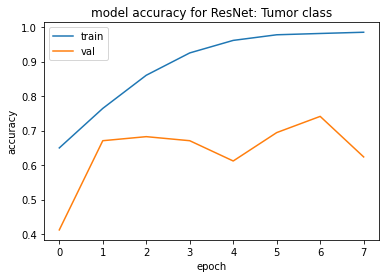

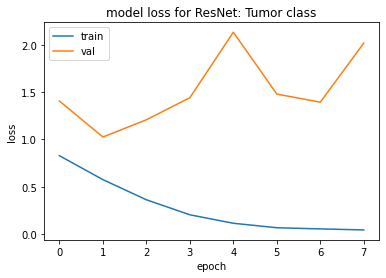

In [14]:
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy for ResNet: Tumor class')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss for ResNet: Tumor class')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [55]:
y_pred_int = np.argmax(y_pred, axis=1) 
y_pred_int.dtype

dtype('int64')

In [59]:
from sklearn.metrics import classification_report

target_names = ['GBM', 'LYM', 'Mets']
print(classification_report(y_test, y_pred_int, target_names=target_names))

              precision    recall  f1-score   support

         GBM       0.60      0.81      0.69        26
         LYM       0.79      0.58      0.67        26
        Mets       0.80      0.75      0.77        32

    accuracy                           0.71        84
   macro avg       0.73      0.71      0.71        84
weighted avg       0.73      0.71      0.71        84



In [60]:
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test_enc1, y_pred)
lr_auc 

0.8582835985853228

In [75]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in [0,1,2]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test)==l,
                                                      np.array(y_pred_int)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

,class,sensitivity,specificity
0,0,0.966102,0.714286
1,1,0.977273,0.230769
2,2,0.636364,0.956522
